# LIBRARIES

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Dataset

In [113]:
# TAKE THE DATA FROM JSON
with open('../Simulation/data_pos_sim.json') as f:
    data_dict = json.load(f)

data_list = [data_dict['LF'],data_dict['RF']]
data_array = np.array(data_list).T
print(data_array)
# CREATE A DATAFRAME BY WINDOWING THE RAW AND INCREMENTING THE POSITION OF THE WINDOW
rows,columns = data_array.shape
window_size = 20
data_window = np.zeros((rows-window_size+1,window_size*2))
for i in range(rows - window_size):
    data_window[i] = np.append(data_array[i:window_size+i,:].T[0],data_array[i:window_size+i,:].T[1])

names = []
for j in range(window_size):
    names += ["angleLF"+str(j+1)]
for j in range(window_size):
    names += ["angleRF"+str(j+1)]

# DATA FRAME PANDAS
angle_df = pd.DataFrame(data=data_window,columns = names) 
angle_df.dropna(how='all', inplace=True)
angle_df.head()


[[ 73.0605667   89.        ]
 [ 72.50212753  88.        ]
 [ 71.93561375  87.        ]
 [ 71.36146689  86.        ]
 [ 70.78010127  85.        ]
 [ 70.19190644  84.        ]
 [ 69.59724939  83.        ]
 [ 68.99647655  82.        ]
 [ 68.38991552  81.        ]
 [ 67.77787665  80.        ]
 [ 67.16065452  79.        ]
 [ 66.53852918  78.        ]
 [ 65.91176734  77.        ]
 [ 65.28062342  76.        ]
 [ 64.64534055  75.        ]
 [ 64.00615139  74.        ]
 [ 63.363279    73.        ]
 [ 62.71693753  72.        ]
 [ 62.06733292  71.        ]
 [ 61.41466351  70.        ]
 [ 60.75912062  69.        ]
 [ 60.10088908  68.        ]
 [ 59.44014772  67.        ]
 [ 58.77706981  66.        ]
 [ 58.11182349  65.        ]
 [ 57.44457217  64.        ]
 [ 56.77547486  63.        ]
 [ 56.10468653  62.        ]
 [ 55.43235842  61.        ]
 [ 54.75863833  60.        ]
 [ 54.0836709   59.        ]
 [ 53.40759784  58.        ]
 [ 52.7305582   57.        ]
 [ 52.05268855  56.        ]
 [ 51.37412323

,angleLF1,angleLF2,angleLF3,angleLF4,angleLF5,angleLF6,angleLF7,angleLF8,angleLF9,angleLF10,...,angleRF11,angleRF12,angleRF13,angleRF14,angleRF15,angleRF16,angleRF17,angleRF18,angleRF19,angleRF20
0,73.060567,72.502128,71.935614,71.361467,70.780101,70.191906,69.597249,68.996477,68.389916,67.777877,...,79.0,78.0,77.0,76.0,75.0,74.0,73.0,72.0,71.0,70.0
1,72.502128,71.935614,71.361467,70.780101,70.191906,69.597249,68.996477,68.389916,67.777877,67.160655,...,78.0,77.0,76.0,75.0,74.0,73.0,72.0,71.0,70.0,69.0
2,71.935614,71.361467,70.780101,70.191906,69.597249,68.996477,68.389916,67.777877,67.160655,66.538529,...,77.0,76.0,75.0,74.0,73.0,72.0,71.0,70.0,69.0,68.0
3,71.361467,70.780101,70.191906,69.597249,68.996477,68.389916,67.777877,67.160655,66.538529,65.911767,...,76.0,75.0,74.0,73.0,72.0,71.0,70.0,69.0,68.0,67.0
4,70.780101,70.191906,69.597249,68.996477,68.389916,67.777877,67.160655,66.538529,65.911767,65.280623,...,75.0,74.0,73.0,72.0,71.0,70.0,69.0,68.0,67.0,66.0


# Standardizing the Data

In [104]:
def standardize_data(arr): 
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    for column in range(columns):  
        mean = np.mean(arr[:,column])
        std = np.std(arr[:,column])
        tempArray = np.empty(0)
        for element in arr[:,column]:
            tempArray = np.append(tempArray, ((element - mean) / std))
        standardizedArray[:,column] = tempArray
    return standardizedArray

$z = \frac{x_i - \mu(x)}{\sigma(x)}$

In [105]:
# Standardizing data
angle_std = angle_df.values
angle_std = standardize_data(angle_std)

# Computing the Eigenvectors and Eigenvalues

In [106]:
#Calculating the covariance matrix
cov_matrix = np.cov(angle_std.T)
print(cov_matrix,"\n")

# Using np.linalg.eig function
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
# eigen_vec(:,i) is an eigenvector
print("Eigenvector: \n",eigen_vec,"\n")
print("Eigenvalues: \n", eigen_val, "\n")

# Calculating the explained variance on each of components
var_explained = []
for i in eigen_val:
     var_explained.append((i/sum(eigen_val))*100)
print("Explained variance: \n",var_explained,"\n")

# Sort the egeinvalues and the eigenvectors accordingly
rows, columns = eigen_vec.shape
temp_eigen_val = np.zeros(columns)
temp_eigen_vec = np.zeros((rows,columns))
index_sort = np.argsort(-eigen_val) # the - is for descending
for i in range(columns):
    temp_eigen_val[i] = eigen_val[index_sort[i]]
    temp_eigen_vec[:,i] = eigen_vec[:,index_sort[i]]
eigen_val = temp_eigen_val
eigen_vec = temp_eigen_vec

[[1.00444444 1.00382428 1.00203034 ... 0.8455199  0.82969616 0.81327526]
 [1.00382428 1.00444444 1.00382617 ... 0.86105009 0.84593031 0.83018522]
 [1.00203034 1.00382617 1.00444444 ... 0.87580041 0.86140823 0.84636263]
 ...
 [0.8455199  0.86105009 0.87580041 ... 1.00444444 1.00383525 1.0020894 ]
 [0.82969616 0.84593031 0.86140823 ... 1.00383525 1.00444444 1.00384061]
 [0.81327526 0.83018522 0.84636263 ... 1.0020894  1.00384061 1.00444444]] 

Eigenvector: 
 [[-1.53407080e-01  2.52659940e-01  1.45811262e-01 ... -2.82739190e-02
  -6.56223384e-03  1.14988293e-04]
 [-1.54903786e-01  2.27913864e-01  1.50702333e-01 ...  1.06652340e-01
   2.07676463e-02 -1.20853992e-03]
 [-1.56239809e-01  2.02557686e-01  1.55006596e-01 ... -1.98101876e-01
  -2.38354862e-02  8.44805563e-03]
 ...
 [-1.56053202e-01 -2.07826824e-01 -1.44883584e-01 ... -1.48560880e-01
  -1.27654173e-01 -1.90638812e-01]
 [-1.54721193e-01 -2.32783940e-01 -1.38416213e-01 ...  1.02577256e-01
   8.52436024e-02  1.07229823e-01]
 [-1.5324

# PROJECTION ON PCs

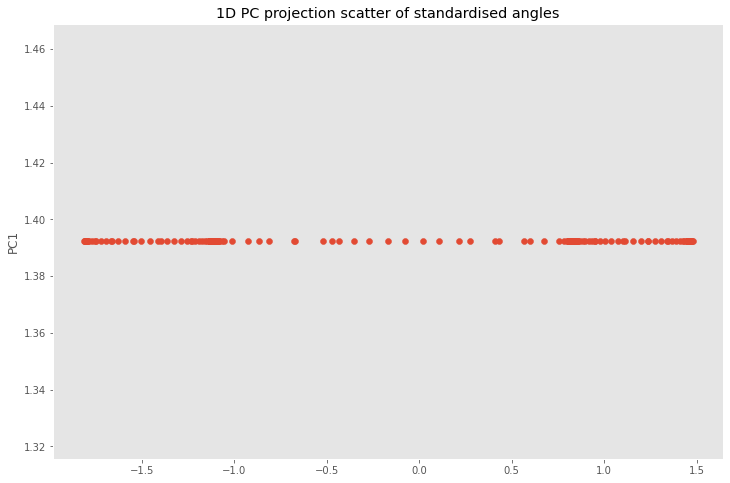

In [107]:
# Projection on PC1
PC1 = np.array([eigen_vec[:,1]])
angle_pca_1D = np.matmul(PC1,angle_std.T)
rows,columns = angle_std.shape
angle_pca_1D = np.append(angle_pca_1D, np.full((1,rows),eigen_val[1]), axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(angle_pca_1D[0],angle_pca_1D[1])
plt.title("1D PC projection scatter of standardised angles")
plt.ylabel("PC1")
plt.grid()
plt.show()
plt.close()

# Visualize the clusters 

(98, 2) 

 (4, 2) 

 (124, 2)


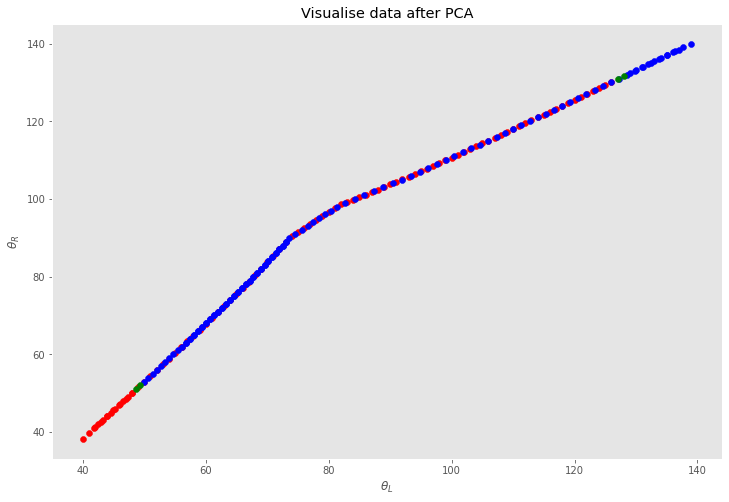

In [108]:
left = []
middle = []
right = []

for i in range(rows):
    if angle_pca_1D[0][i] < -0.25:
        left += [data_array[i].tolist()]
    elif angle_pca_1D[0][i] > 0.15:
        right += [data_array[i].tolist()]
    else:
        middle += [data_array[i].tolist()]

#print(left,"\n\n",middle,"\n\n",right)

left = np.array(left)
middle = np.array(middle)
right = np.array(right)
print(left.shape,"\n\n",middle.shape,"\n\n",right.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(left.T[0],left.T[1],color='r')
ax.scatter(right.T[0],right.T[1],color='b')
ax.scatter(middle.T[0],middle.T[1],color='g')
plt.title("Visualise data after PCA")
plt.ylabel(r'$\theta_R$')
plt.xlabel(r'$\theta_L$')
plt.grid()
plt.show()
plt.close()
